# **Preços dos Combustíveis no Brasil** | *Gas Prices in Brazil*

Preços dos combustíveis no Brasil entre os anos de 2004 e 2019 | *Gas Prices in Brazil from 2004 to 2019*

# 1. Entendimento do problema

A Agência Nacional do Petróleo, Gás Natural e Biocombustíveis (ANP) semanalmente reporta os valores de distribuição e revenda para combustíveis como gás, diesel e outros usados no transporte ao redor do país. Entre estes dados, encontram-se o número de postos avaliados, a região e estado, o preço médio de distribuição e revenda, juntamente aos mínimos e máximos, desvios, margem de revenda, entre outros.

O objetivo deste estudo, dessa forma, é analisar alguns pontos de interesse, como:

$\bullet$ Como se dá a variação de preços dos combustíveis por região e estado do país;

$\bullet$ Como foi a evolução temporal durante os anos de 2004 e 2019 nas médias de preço de distribuição e revenda;

$\bullet$ Quais fatores estão correlacionados (preços, desvios, estados, etc);

$\bullet$ Todos os produtos possuem preços próximos ou existem produtos com valores muito abaixo ou muito acima dos demais?

E, por fim, 

$\bullet$ Construir um modelo via regressão linear que seja capaz de predizer o preço médio de distribuição dados estado, região, ano, produto e preço médio de revenda de interesse.

# Fonte

Como mencionado anteriormente, os conjuntos de dados são fornecidos pela ANP e regularmente atualizados com novos dados e novas informações. Estes dados podem ser consultados no link: http://www.anp.gov.br/precos-e-defesa-da-concorrencia/precos/levantamento-de-precos/serie-historica-do-levantamento-de-precos-e-de-margens-de-comercializacao-de-combustiveis. Para este estudo, foi utilizado o dataset disponibilizado no Kaggle por Matheus Eduardo Freitag em https://www.kaggle.com/matheusfreitag/gas-prices-in-brazil.


# 2. Obtenção do conjunto de dados

Vamos iniciar o estudo importanto as bibliotecas que iremos utilizar nesta etapa.

In [667]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Colocamos o arquivo .tsv dentro da sessão do Colab, o que requer a importação toda vez que o script for aberto. Caso o script seja executado no Jupyter, não há necessidade de importar o arquivo toda vez, basta incluí-lo na pasta do notebook.

In [668]:
## IMPORTANDO ARQUIVOS
# Escrevendo em um arquivo tsv
df = pd.read_csv("2004-2019.tsv",sep='\t')
df.head(5) # visualizando as 5 primeiras linhas do dataset

,Unnamed: 0,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO,MÊS,ANO
0,0,2004-05-09,2004-05-15,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,R$/l,1.288,0.016,1.19,1.350,0.463,0.012,0.825,0.11,0.4201,0.9666,0.133,5,2004
1,1,2004-05-09,2004-05-15,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,387,R$/l,1.162,0.114,0.89,1.449,0.399,0.098,0.763,0.088,0.5013,1.05,0.115,5,2004
2,2,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,192,R$/l,1.389,0.097,1.18,1.760,0.419,0.070,0.97,0.095,0.5614,1.161,0.098,5,2004
3,3,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,162,R$/l,1.262,0.070,1.09,1.509,0.432,0.055,0.83,0.119,0.5991,1.22242,0.143,5,2004
4,4,2004-05-09,2004-05-15,NORDESTE,ALAGOAS,ETANOL HIDRATADO,103,R$/l,1.181,0.078,1.05,1.400,0.24,0.066,0.941,0.077,0.7441,1.0317,0.082,5,2004


Podemos observar, de início, que existe uma coluna chamada *Unnamed: 0* que faz o papel do índice. Iremos, por ora, excluí-la para facilitar nossa análise.

Observamos também que temos diversos dados interessantes, a saber, a data inicial e final da amostra coletada, a região e estado, o produto, o número de postos pesquisados, a unidade de medida do preço, preços médios de revenda e distribuição, bem como seus mínimos, máximos e desvios, a margem média de revenda e o coeficiente de variação de revenda e distribuição, o ano e o mês analisados. 

In [669]:
del df['Unnamed: 0']
df.head(5)

,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO,MÊS,ANO
0,2004-05-09,2004-05-15,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,R$/l,1.288,0.016,1.19,1.350,0.463,0.012,0.825,0.11,0.4201,0.9666,0.133,5,2004
1,2004-05-09,2004-05-15,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,387,R$/l,1.162,0.114,0.89,1.449,0.399,0.098,0.763,0.088,0.5013,1.05,0.115,5,2004
2,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,192,R$/l,1.389,0.097,1.18,1.760,0.419,0.070,0.97,0.095,0.5614,1.161,0.098,5,2004
3,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,162,R$/l,1.262,0.070,1.09,1.509,0.432,0.055,0.83,0.119,0.5991,1.22242,0.143,5,2004
4,2004-05-09,2004-05-15,NORDESTE,ALAGOAS,ETANOL HIDRATADO,103,R$/l,1.181,0.078,1.05,1.400,0.24,0.066,0.941,0.077,0.7441,1.0317,0.082,5,2004


Iremos agora avançar com a Análise Exploratória dos dados e procurar entender a dinâmica que existe entre os dados e como podemos extrair informações úteis para o estudo.

# 3. Análise Exploratória dos Dados (EDA) - Visão geral do conjunto de dados

Nessa etapa, iremos

$\bullet$ Identificar o tipo de cada variável (numérica, categórica, temporal)

$\bullet$ Identificar qual é a variável target (alvo) para o nosso problema

$\bullet$ Exploração dos dados (medidas descritivas, distribuição das variáveis)


# A. Identificando as variáveis presentes no dataset

In [670]:
pd.DataFrame.info(df);

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106823 entries, 0 to 106822
Data columns (total 20 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   DATA INICIAL                   106823 non-null  object 
 1   DATA FINAL                     106823 non-null  object 
 2   REGIÃO                         106823 non-null  object 
 3   ESTADO                         106823 non-null  object 
 4   PRODUTO                        106823 non-null  object 
 5   NÚMERO DE POSTOS PESQUISADOS   106823 non-null  int64  
 6   UNIDADE DE MEDIDA              106823 non-null  object 
 7   PREÇO MÉDIO REVENDA            106823 non-null  float64
 8   DESVIO PADRÃO REVENDA          106823 non-null  float64
 9   PREÇO MÍNIMO REVENDA           106823 non-null  float64
 10  PREÇO MÁXIMO REVENDA           106823 non-null  float64
 11  MARGEM MÉDIA REVENDA           106823 non-null  object 
 12  COEF DE VARIAÇÃO REVENDA      

Podemos observar aqui que a margem média de revenda, o preço médio de distribuição, o desvio padrão distribuição, os preços mínimo e máximo de distribuição e o coeficiente de variação de distribuição estão categorizados como *objetos*. Temos que transformá-los em variáveis do tipo *float* para avançarmos com a análise.

Além disso, temos um conjunto de dados com 106823 amostras, o que podemos considerar um número interessante para a análise.

**Alterando os tipos das variáveis para a forma mais conveniente**

In [671]:
def coerce_df_columns_to_numeric(df, column_list):
    df[column_list] = df[column_list].apply(pd.to_numeric, errors='coerce')

coerce_df_columns_to_numeric(df, ["MARGEM MÉDIA REVENDA", "PREÇO MÉDIO DISTRIBUIÇÃO","DESVIO PADRÃO DISTRIBUIÇÃO","PREÇO MÍNIMO DISTRIBUIÇÃO", "PREÇO MÁXIMO DISTRIBUIÇÃO","COEF DE VARIAÇÃO DISTRIBUIÇÃO"])

In [672]:
pd.DataFrame.info(df);

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106823 entries, 0 to 106822
Data columns (total 20 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   DATA INICIAL                   106823 non-null  object 
 1   DATA FINAL                     106823 non-null  object 
 2   REGIÃO                         106823 non-null  object 
 3   ESTADO                         106823 non-null  object 
 4   PRODUTO                        106823 non-null  object 
 5   NÚMERO DE POSTOS PESQUISADOS   106823 non-null  int64  
 6   UNIDADE DE MEDIDA              106823 non-null  object 
 7   PREÇO MÉDIO REVENDA            106823 non-null  float64
 8   DESVIO PADRÃO REVENDA          106823 non-null  float64
 9   PREÇO MÍNIMO REVENDA           106823 non-null  float64
 10  PREÇO MÁXIMO REVENDA           106823 non-null  float64
 11  MARGEM MÉDIA REVENDA           103392 non-null  float64
 12  COEF DE VARIAÇÃO REVENDA      

Podemos ver agora que as variáveis estão com os tipos convenientes. Precisamos, além disso, verificar a existência de linhas com *NaNs* e eliminá-las, de modo que o conjunto de dados não comprometa os *insights* que buscamos.

**Excluindo linhas com *NaNs***

In [673]:
df = df.dropna()
df = df.reset_index(drop=True)

pd.DataFrame.info(df);

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103392 entries, 0 to 103391
Data columns (total 20 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   DATA INICIAL                   103392 non-null  object 
 1   DATA FINAL                     103392 non-null  object 
 2   REGIÃO                         103392 non-null  object 
 3   ESTADO                         103392 non-null  object 
 4   PRODUTO                        103392 non-null  object 
 5   NÚMERO DE POSTOS PESQUISADOS   103392 non-null  int64  
 6   UNIDADE DE MEDIDA              103392 non-null  object 
 7   PREÇO MÉDIO REVENDA            103392 non-null  float64
 8   DESVIO PADRÃO REVENDA          103392 non-null  float64
 9   PREÇO MÍNIMO REVENDA           103392 non-null  float64
 10  PREÇO MÁXIMO REVENDA           103392 non-null  float64
 11  MARGEM MÉDIA REVENDA           103392 non-null  float64
 12  COEF DE VARIAÇÃO REVENDA      

Observamos que de 106823 temos uma redução para 103392 amostras, redução esta que não afeta de forma significativa a análise, uma vez que ainda temos número expressivo de dados para trabalhar.

# B. Identificando a variável alvo

Como mencionado anteriormente, o nosso objetivo é construir um modelo via regressão linear com múltiplos parâmetros que seja capaz de, dadas algumas informações de interesse, entregar o valor do preço médio de distribuição para um dado tipo de combustível. Portanto, **PREÇO MÉDIO DISTRIBUIÇÃO** será nossa variável alvo.


# C. Análise exploratória dos dados

Vamos obter algumas medidas descritivas para entender melhor como estão estruturados os dados.

In [674]:
df.describe()

,NÚMERO DE POSTOS PESQUISADOS,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO,MÊS,ANO
count,103392.000000,103392.000000,103392.000000,103392.000000,103392.000000,103392.000000,103392.000000,103392.000000,103392.000000,103392.000000,103392.000000,103392.000000,103392.000000,103392.000000
mean,240.511935,10.784472,0.652589,9.334931,12.458686,2.225151,0.045749,8.559322,0.559441,7.414814,9.805621,0.046640,6.485067,2011.737001
std,408.039174,17.685852,1.346422,15.024383,20.801190,4.375085,0.024488,13.603686,1.256914,11.681366,15.933999,0.042114,3.442155,4.410491
min,1.000000,0.766000,0.000000,0.590000,0.999000,0.001000,0.000000,0.506000,0.000000,0.325700,0.599200,0.000000,1.000000,2004.000000
25%,47.000000,2.073000,0.073000,1.900000,2.330000,0.282000,0.030000,1.795000,0.047000,1.674400,1.945600,0.021000,4.000000,2008.000000
50%,108.000000,2.723000,0.115000,2.509000,3.000000,0.383000,0.042000,2.335000,0.077000,2.220000,2.507050,0.031000,6.000000,2012.000000
75%,251.000000,3.745000,0.190000,3.490000,4.150000,0.560000,0.058000,3.307000,0.151000,3.142800,3.520000,0.061000,9.000000,2016.000000
max,4167.000000,99.357000,10.748000,90.000000,120.000000,36.847000,0.262000,83.137000,18.385000,83.000000,94.500000,0.780000,12.000000,2019.000000


Podemos observar que foram pesquisados, em média, 240 postos, considerando todas as regiões do Brasil, sendo o preço médio de revenda de aproximadamente 11 reais por litro de combustível ou m³ de gás, com valores de preço mínimo e máximo de 0.65 e 9.4 reais por litro de combustível ou m³ de gás, em média, respectivamente.

O preço médio de distribuição foi de 8.6 em média, aproximadamente, com mínimo de 7.4 e máximo de 9.8, em média, por litro de combustível ou m³ de gás. Um aspecto que chama a atenção é o de que os valores mínimo e máximo para preço médio de revenda e de distribuição encontram-se entre menos de 1 real e próximo de 100 reais por litro de combustível ou m³ de gás. Isso pode indicar que para determinado tipo de combustível, os preços são bastante diferentes, já que na prática é difícil ver um aumento tão expressivo em um período de tempo tão curto.

# Distribuição das variáveis


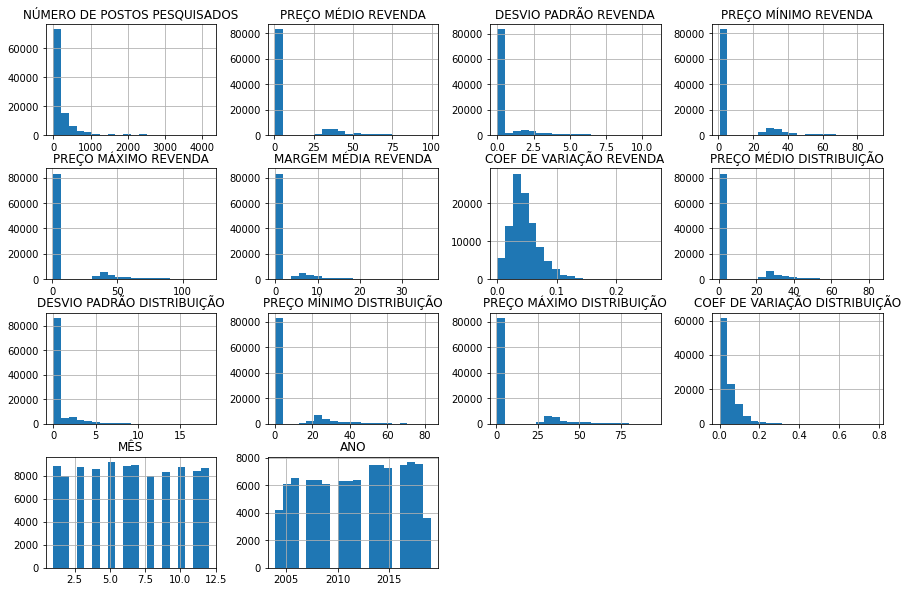

In [675]:
df.hist(bins = 20, figsize=(15,10));

Observamos que a maior parte dos dados de preços foi obtida por pesquisa em até 500 postos por amostra, aproximadamente, com poucas amostras coletadas com mais de 500 postos.

As variáveis preço médio de revenda, desvio padrão de revenda, preço mínimo de revenda, preço máximo de revenda, margem média de revenda, preço médio de distribuição, desvio padrão de distribuição, preço mínimo de distribuição e preço máximo de distribuição sugerem, como dito antes, que existe algum tipo de combustível com valor muito maior que outros, o que acarreta o comportamento mostrado (mais de 80000 amostras com valores relativamente baixos, comparando-se com os demais à frente - direita).

O coeficiente de variação de revenda aparenta seguir uma distribuição normal com leve assimetria à esquerda, enquanto o coeficiente de variação de distribuição apresenta um comportamento de distribuição exponencial. 

Já as variáveis ano e mês aparentam não ter discrepâncias em relação às amostras, ou seja, o número de amostras parece estar distribuído igualmente pelos meses e anos durante o período de análise. 

**Análise por região**

In [676]:
df_plot = df.groupby(['REGIÃO']) ['PREÇO MÉDIO DISTRIBUIÇÃO'].mean().reset_index () 
df_plot

,REGIÃO,PREÇO MÉDIO DISTRIBUIÇÃO
0,CENTRO OESTE,9.861629
1,NORDESTE,7.489549
2,NORTE,10.411340
3,SUDESTE,7.492509
4,SUL,7.971197


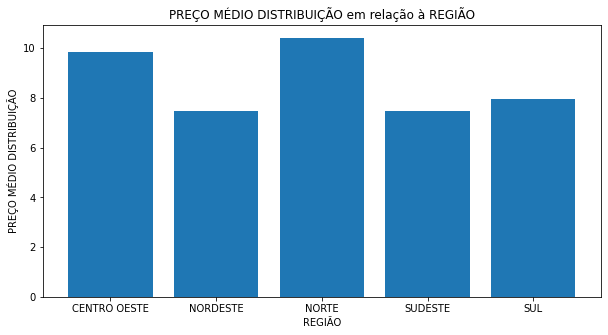

In [677]:
# REGIÃO em relação a variável 	PREÇO MÉDIO DISTRIBUIÇÃO
x = df_plot['REGIÃO']
y = df_plot['PREÇO MÉDIO DISTRIBUIÇÃO']
plt.figure(figsize=(10,5))
plt.bar(x,y); #color=cols);
plt.title('PREÇO MÉDIO DISTRIBUIÇÃO em relação à REGIÃO');
plt.xlabel('REGIÃO');
plt.ylabel('PREÇO MÉDIO DISTRIBUIÇÃO');

Observamos por este gráfico que a região Norte apresenta maiores valores de preço médio de distribuição, enquanto as regiões Nordeste e Sudeste apresentam os menores valores. Percebe-se, assim, que esta variável exerce influência no preço médio de distribuição. Iremos, por enquanto, mantê-la como candidata em nosso estudo.

**Análise por mês**

In [678]:
df_plot = df.groupby(['MÊS']) ['PREÇO MÉDIO DISTRIBUIÇÃO'].mean().reset_index () 
df_plot

,MÊS,PREÇO MÉDIO DISTRIBUIÇÃO
0,1,8.629090
1,2,8.657042
2,3,8.630544
3,4,8.687616
4,5,8.464902
5,6,8.569461
6,7,8.412760
7,8,8.332160
8,9,8.454544
9,10,8.514423


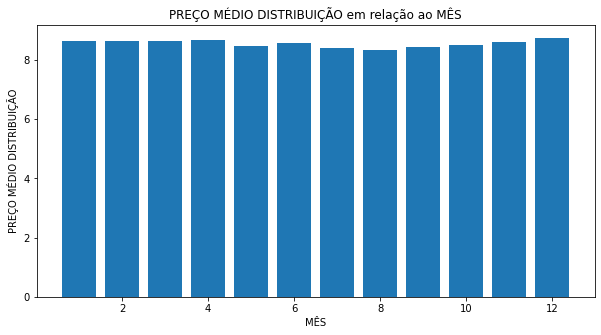

In [679]:
# MÊS em relação a variável 	PREÇO MÉDIO DISTRIBUIÇÃO
x = df_plot['MÊS']
y = df_plot['PREÇO MÉDIO DISTRIBUIÇÃO']
plt.figure(figsize=(10,5))
plt.bar(x,y); #color=cols);
plt.title('PREÇO MÉDIO DISTRIBUIÇÃO em relação ao MÊS');
plt.xlabel('MÊS');
plt.ylabel('PREÇO MÉDIO DISTRIBUIÇÃO');

Em relação ao mês, não existe grande influência no preço médio de distribuição. Portanto, vamos descartar esta variável, pois ela não irá acrescentar em nosso estudo.

**Análise por ano**

In [680]:
df_plot = df.groupby(['ANO']) ['PREÇO MÉDIO DISTRIBUIÇÃO','PREÇO MÉDIO REVENDA'].mean().reset_index () 
df_plot

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,ANO,PREÇO MÉDIO DISTRIBUIÇÃO,PREÇO MÉDIO REVENDA
0,2004,6.906850,8.374046
1,2005,6.992300,8.353192
2,2006,7.461841,8.929306
3,2007,7.504293,9.084344
4,2008,7.575823,9.247241
5,2009,7.721762,9.541714
6,2010,8.114539,10.171957
7,2011,8.257765,10.293647
8,2012,8.207231,10.246862
9,2013,7.193861,9.051892


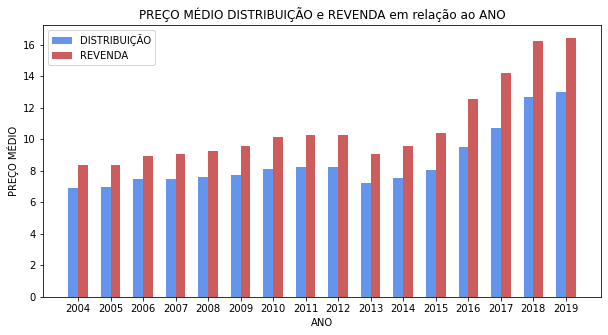

In [681]:
# ANO em relação a variável PREÇO MÉDIO DISTRIBUIÇÃO e PREÇO MÉDIO REVENDA
x = df_plot['ANO']
y = df_plot['PREÇO MÉDIO DISTRIBUIÇÃO']
z = df_plot['PREÇO MÉDIO REVENDA']

width = 0.3;

plt.figure(figsize=(10,5))
plt.bar(x,y, width,color=myblue, label = 'DISTRIBUIÇÃO'); #color=cols);
plt.bar(x+width,z, width, color=myred, label = 'REVENDA'); #color=cols);

plt.title('PREÇO MÉDIO DISTRIBUIÇÃO e REVENDA em relação ao ANO');
plt.xlabel('ANO');
plt.ylabel('PREÇO MÉDIO');

plt.xticks(x + width / 2, ('2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014',
                           '2015','2016','2017','2018','2019'))

# Finding the best position for legends and putting it
plt.legend(loc='best')
plt.show()

Em relação ao ano, observa-se um crescimento acentuado a partir de 2016, de modo que tanto preço médio de distribuição quanto preço médio de revenda sofrem aumentos consideráveis. Dessa forma, a variável ano é importante na análise, uma vez que ela descreve essa dinâmica de variação que a variável alvo sofre a partir de um determinado período.

**Análise por produto**

In [682]:
df_plot = df.groupby(['PRODUTO']) ['PREÇO MÉDIO DISTRIBUIÇÃO','PREÇO MÉDIO REVENDA'].mean().reset_index () 
df_plot

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,PRODUTO,PREÇO MÉDIO DISTRIBUIÇÃO,PREÇO MÉDIO REVENDA
0,ETANOL HIDRATADO,1.988018,2.310683
1,GASOLINA COMUM,2.640502,3.047753
2,GLP,34.585412,44.444013
3,GNV,1.345024,1.838703
4,ÓLEO DIESEL,2.150717,2.422039
5,ÓLEO DIESEL S10,2.776182,3.142957


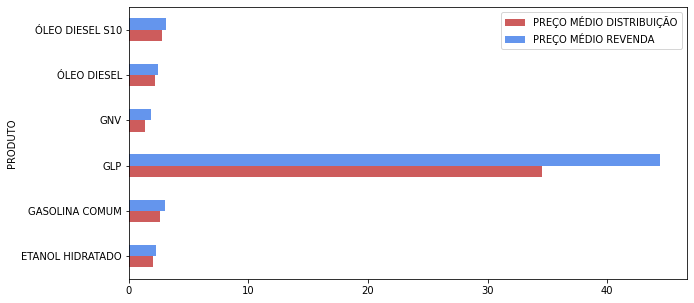

In [683]:
df_ = pd.DataFrame(
    {'PRODUTO': df_plot['PRODUTO'],
     'PREÇO MÉDIO DISTRIBUIÇÃO': df_plot['PREÇO MÉDIO DISTRIBUIÇÃO'],
     'PREÇO MÉDIO REVENDA': df_plot['PREÇO MÉDIO REVENDA']
    })

df_.plot(x="PRODUTO", y=["PREÇO MÉDIO DISTRIBUIÇÃO", "PREÇO MÉDIO REVENDA"], kind="barh", color=cols, figsize=(10,5))

Este gráfico confirma o que antes havíamos constatado, ou seja, o GLP (Gás Liquefeito de Petróleo) possui um valor médio de revenda e distribuição discrepante dos demais. Considerando que queremos construir um modelo via regressão linear, iremos excluir essa categoria de produto porque ela influenciará diretamente no preço médio de distribuição quando escolhermos outro tipo de combustível, levando as predições errôneas.

Uma saída para este problema seria normalizar/transformar os dados para que, por produto, os preços médios de distribuição e revenda não estejam tão discrepantes; no entanto, para este estudo, optamos por excluir a categoria GLP e seguirmos com as demais.

**Análise por estado**

In [684]:
df_plot = df.groupby(['ESTADO']) ['PREÇO MÉDIO DISTRIBUIÇÃO','PREÇO MÉDIO REVENDA'].mean().reset_index () 
df_plot

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,ESTADO,PREÇO MÉDIO DISTRIBUIÇÃO,PREÇO MÉDIO REVENDA
0,ACRE,11.693913,13.582096
1,ALAGOAS,6.343445,8.347267
2,AMAPA,10.015168,12.677058
3,AMAZONAS,9.280442,10.775515
4,BAHIA,7.151402,9.406878
5,CEARA,6.664367,8.530231
6,DISTRITO FEDERAL,9.726359,12.384183
7,ESPIRITO SANTO,7.560562,9.843792
8,GOIAS,9.844750,11.856114
9,MARANHAO,9.535118,12.025352


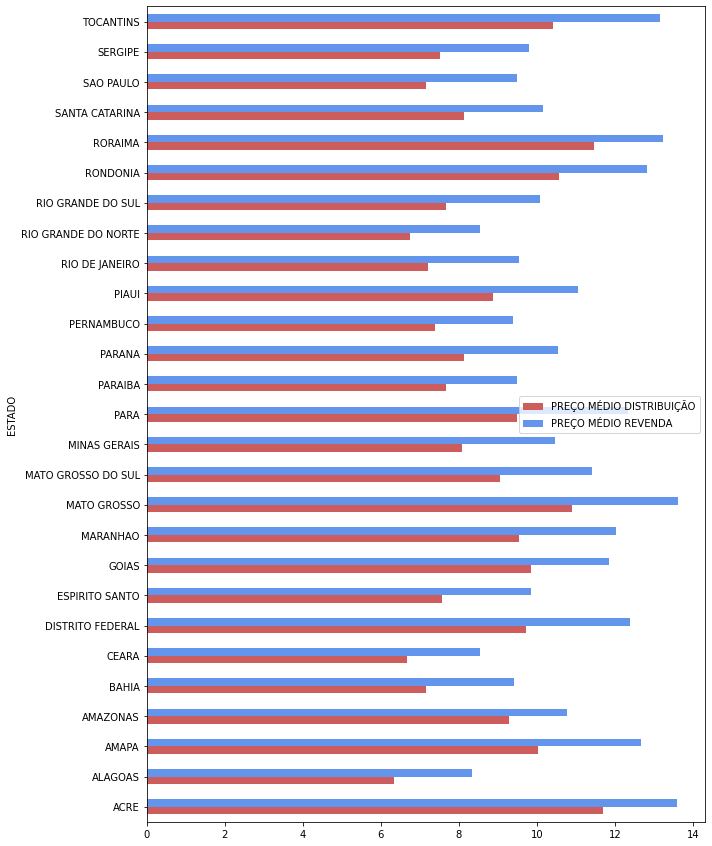

In [685]:
df_ = pd.DataFrame(
    {'ESTADO': df_plot['ESTADO'],
     'PREÇO MÉDIO DISTRIBUIÇÃO': df_plot['PREÇO MÉDIO DISTRIBUIÇÃO'],
     'PREÇO MÉDIO REVENDA': df_plot['PREÇO MÉDIO REVENDA']
    })

df_.plot(x="ESTADO", y=["PREÇO MÉDIO DISTRIBUIÇÃO", "PREÇO MÉDIO REVENDA"], kind="barh", color=cols, figsize=(10,15))

Finalizando a parte das variáveis categóricas, a influência do estado é visível ao mesmo tempo em que corrobora com a variável região, previamente analisada. Os estados de Mato Grosso, Acre e Roraima são os que apresentam maiores valores de preço médio de distribuição e revenda, enquanto os estados de Rio Grande do Norte, Ceará e Alagoas, os menores valores. Usaremos, assim, esta variável em nosso modelo.

# Variáveis numéricas

Vamos agora trabalhar com as variáveis numéricas do conjunto de dados, inicialmente verificando a matriz de correlação entre elas e como podemos usar esta informação para construção do nosso modelo e para explorar cada uma das variáveis.

In [686]:
df_cont = df[['NÚMERO DE POSTOS PESQUISADOS','PREÇO MÉDIO REVENDA','DESVIO PADRÃO REVENDA','PREÇO MÍNIMO REVENDA','PREÇO MÁXIMO REVENDA','MARGEM MÉDIA REVENDA',
              'COEF DE VARIAÇÃO REVENDA','PREÇO MÉDIO DISTRIBUIÇÃO','DESVIO PADRÃO DISTRIBUIÇÃO','PREÇO MÍNIMO DISTRIBUIÇÃO',
              'PREÇO MÁXIMO DISTRIBUIÇÃO','COEF DE VARIAÇÃO DISTRIBUIÇÃO']]
df_cont

,NÚMERO DE POSTOS PESQUISADOS,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO
0,127,1.288,0.016,1.190,1.350,0.463,0.012,0.825,0.110,0.4201,0.96660,0.133
1,387,1.162,0.114,0.890,1.449,0.399,0.098,0.763,0.088,0.5013,1.05000,0.115
2,192,1.389,0.097,1.180,1.760,0.419,0.070,0.970,0.095,0.5614,1.16100,0.098
3,162,1.262,0.070,1.090,1.509,0.432,0.055,0.830,0.119,0.5991,1.22242,0.143
4,103,1.181,0.078,1.050,1.400,0.240,0.066,0.941,0.077,0.7441,1.03170,0.082
...,...,...,...,...,...,...,...,...,...,...,...,...
103387,7,3.574,0.065,3.499,3.690,0.818,0.018,2.756,0.000,2.7560,2.75600,0.000
103388,23,3.401,0.129,3.230,3.789,0.950,0.038,2.451,0.402,1.9842,2.86610,0.164
103389,24,2.912,0.190,2.699,3.499,0.914,0.065,1.998,0.000,1.9981,1.99810,0.000
103390,52,3.020,0.229,2.699,3.490,0.646,0.076,2.374,0.165,2.0179,2.50930,0.070


**Matriz de Correlação**

Importando a biblioteca seaborn para visualização da matriz de correlação

In [687]:
import seaborn as sns

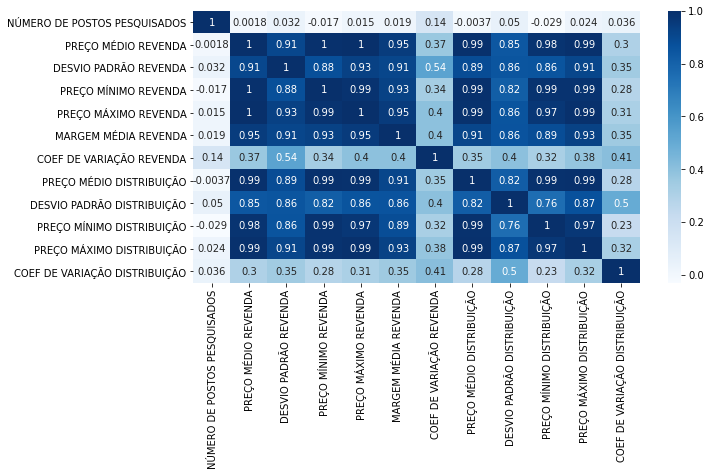

In [688]:
plt.figure(figsize=(10,5))
sns.heatmap(df_cont.corr(),annot = True, cmap='Blues');

Observa-se que o número de postos pesquisados apresenta baixa correlação com as demais variáveis, de modo que não usaremos esta variável no estudo. Já as outras apresentam alta correlação entre si, principalmente preço médio de distribuição com: preço médio de revenda, desvio padrão de revenda, preços mínimos e máximos de revenda e margem média de revenda. Vamos assumir que não temos dados de preços de distribuição para tentarmos um cenário um pouco mais realista, portanto, temos somente dados de revenda.

Como pode-se observar, também, os dados de revenda são altamente correlacionados, ou seja, usar todos os dados de revenda para predizer o preço médio de distribuição pode não ser uma boa alternativa. Por essa razão, vamos optar pela utilização de somente uma destas variáveis numéricas, a saber, o preço médio de revenda, que possui um alto grau de correlação com a variável alvo.

**Analisando a relação entre preço médio de revenda e preço médio de distribuição**

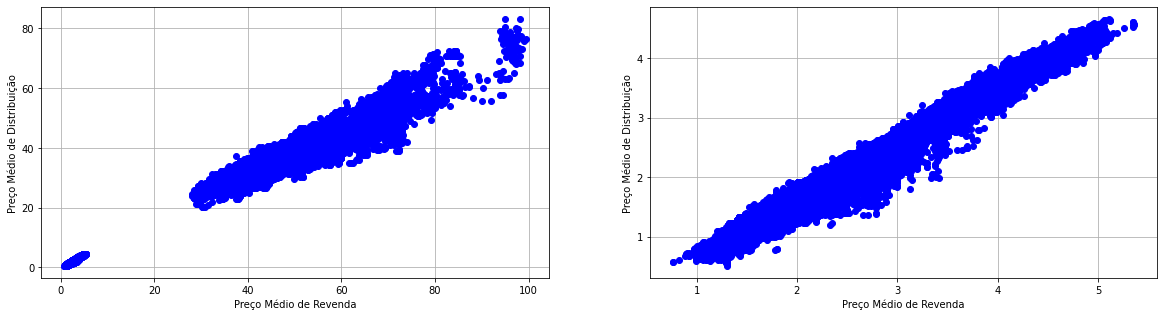

In [689]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plt.plot(df['PREÇO MÉDIO REVENDA'], df['PREÇO MÉDIO DISTRIBUIÇÃO'], 'bo')
plt.xlabel('Preço Médio de Revenda')
plt.ylabel('Preço Médio de Distribuição')
plt.grid()

plt.subplot(1,2,2)
plt.plot(df[df['PREÇO MÉDIO REVENDA']<20]['PREÇO MÉDIO REVENDA'], df[df['PREÇO MÉDIO DISTRIBUIÇÃO']<10]['PREÇO MÉDIO DISTRIBUIÇÃO'], 'bo')
plt.xlabel('Preço Médio de Revenda')
plt.ylabel('Preço Médio de Distribuição')
plt.grid()

plt.show()

Observa-se que existe um grande espaço entre as amostras, limitada a dois *clusters*, por assim dizer. Possivelmente, os pontos relativos a preço médio de revenda acima de 20 e preço médio de distribuição acima de 10, aproximadamente, estão relacionados ao produto GLP, segundo as investigações feitas anteriormente. Vamos verificar a seguir.

In [690]:
df[df['PREÇO MÉDIO DISTRIBUIÇÃO']>10]

,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO,MÊS,ANO
24019,2004-05-09,2004-05-15,CENTRO OESTE,DISTRITO FEDERAL,GLP,44,R$/13Kg,33.989,0.803,32.0,36.0,6.824,0.024,27.165,3.062,25.0000,29.33,0.113,5,2004
24020,2004-05-09,2004-05-15,CENTRO OESTE,GOIAS,GLP,372,R$/13Kg,30.335,1.841,27.0,36.0,5.328,0.061,25.007,1.756,19.4983,29.00,0.070,5,2004
24021,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO,GLP,97,R$/13Kg,38.568,2.045,33.0,44.0,5.713,0.053,32.855,2.296,27.7500,38.00,0.070,5,2004
24022,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO DO SUL,GLP,109,R$/13Kg,33.388,2.308,29.0,39.0,4.585,0.069,28.803,1.764,24.0000,33.00,0.061,5,2004
24023,2004-05-09,2004-05-15,NORDESTE,ALAGOAS,GLP,22,R$/13Kg,32.391,1.357,27.9,33.0,7.641,0.042,24.750,0.354,24.5000,25.00,0.014,5,2004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103375,2019-06-23,2019-06-29,NORTE,RORAIMA,GLP,24,R$/13Kg,84.500,0.590,83.0,85.0,12.110,0.007,72.390,0.000,72.3900,72.39,0.000,6,2019
103376,2019-06-23,2019-06-29,SUL,SANTA CATARINA,GLP,100,R$/13Kg,69.977,5.119,55.0,85.0,18.275,0.073,51.702,3.339,45.8000,61.50,0.065,6,2019
103377,2019-06-23,2019-06-29,SUDESTE,SAO PAULO,GLP,1017,R$/13Kg,66.893,6.100,50.0,89.9,17.679,0.091,49.214,5.071,40.1900,72.00,0.103,6,2019
103378,2019-06-23,2019-06-29,NORDESTE,SERGIPE,GLP,26,R$/13Kg,68.128,3.421,60.0,75.0,14.050,0.050,54.078,3.941,46.1900,57.43,0.073,6,2019


De fato, os valores são referentes ao GLP, o qual iremos excluir de nossa análise. Dessa forma, considera-se apenas o gráfico à direita na figura anterior, onde os dados podem ser modelados via regressão linear. Iremos seguir na seção adiante.

Resumindo, iremos predizer o valor do preço médio de distribuição para um determinado combustível (a menos do GLP), considerando preço médio de revenda, ano, região e estado .

# 4. Regressão Linear | *Linear Regression*

Importando as bibliotecas necessárias para a construção do modelo.

In [691]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

Vamos inicialmente alterar os nomes dos estados, regiões e produtos para facilitar a análise. Para os estados, iremos trocar por siglas, as regiões e produtos iremos inserir *underlines* (_) no lugar de espaços em branco e removeremos os acentos.

In [692]:
df['ESTADO'].unique()

array(['DISTRITO FEDERAL', 'GOIAS', 'MATO GROSSO', 'MATO GROSSO DO SUL',
       'ALAGOAS', 'BAHIA', 'CEARA', 'MARANHAO', 'PARAIBA', 'PERNAMBUCO',
       'PIAUI', 'RIO GRANDE DO NORTE', 'SERGIPE', 'ACRE', 'AMAPA',
       'AMAZONAS', 'PARA', 'RONDONIA', 'RORAIMA', 'TOCANTINS',
       'ESPIRITO SANTO', 'MINAS GERAIS', 'RIO DE JANEIRO', 'SAO PAULO',
       'PARANA', 'RIO GRANDE DO SUL', 'SANTA CATARINA'], dtype=object)

In [693]:
df['REGIÃO'].unique()

array(['CENTRO OESTE', 'NORDESTE', 'NORTE', 'SUDESTE', 'SUL'],
      dtype=object)

In [694]:
df['PRODUTO'].unique()

array(['ETANOL HIDRATADO', 'GASOLINA COMUM', 'GLP', 'GNV', 'ÓLEO DIESEL',
       'ÓLEO DIESEL S10'], dtype=object)

**Alterando os nomes de colunas e de estados, regiões e produtos**

In [695]:
df_reglin = df.copy()
df_reglin = df_reglin.rename(columns={"PREÇO MÉDIO REVENDA": "PRECO_MEDIO_REVENDA"})
df_reglin = df_reglin.rename(columns={"REGIÃO": "REGIAO"})
df_reglin['REGIAO'] = df_reglin['REGIAO'].replace('CENTRO OESTE','CENTRO_OESTE')

df_reglin['ESTADO'] = df_reglin['ESTADO'].replace('DISTRITO FEDERAL','DF')
df_reglin['ESTADO'] = df_reglin['ESTADO'].replace('RIO DE JANEIRO','RJ')
df_reglin['ESTADO'] = df_reglin['ESTADO'].replace('SAO PAULO','SP')
df_reglin['ESTADO'] = df_reglin['ESTADO'].replace('MATO GROSSO','MT')
df_reglin['ESTADO'] = df_reglin['ESTADO'].replace('MATO GROSSO DO SUL','MS')
df_reglin['ESTADO'] = df_reglin['ESTADO'].replace('RIO GRANDE DO NORTE','RN')
df_reglin['ESTADO'] = df_reglin['ESTADO'].replace('ESPIRITO SANTO','ES')
df_reglin['ESTADO'] = df_reglin['ESTADO'].replace('MINAS GERAIS','MG')
df_reglin['ESTADO'] = df_reglin['ESTADO'].replace('RIO GRANDE DO SUL','RS')
df_reglin['ESTADO'] = df_reglin['ESTADO'].replace('SANTA CATARINA','SC')
df_reglin['ESTADO'] = df_reglin['ESTADO'].replace('GOIAS','GO')
df_reglin['ESTADO'] = df_reglin['ESTADO'].replace('ALAGOAS','AL')
df_reglin['ESTADO'] = df_reglin['ESTADO'].replace('BAHIA','BA')
df_reglin['ESTADO'] = df_reglin['ESTADO'].replace('CEARA','CE')
df_reglin['ESTADO'] = df_reglin['ESTADO'].replace('MARANHAO','MA')
df_reglin['ESTADO'] = df_reglin['ESTADO'].replace('PARAIBA','PB')
df_reglin['ESTADO'] = df_reglin['ESTADO'].replace('PERNAMBUCO','PE')
df_reglin['ESTADO'] = df_reglin['ESTADO'].replace('PIAUI','PI')
df_reglin['ESTADO'] = df_reglin['ESTADO'].replace('SERGIPE','SE')
df_reglin['ESTADO'] = df_reglin['ESTADO'].replace('ACRE','AC')
df_reglin['ESTADO'] = df_reglin['ESTADO'].replace('AMAPA','AP')
df_reglin['ESTADO'] = df_reglin['ESTADO'].replace('AMAZONAS','AM')
df_reglin['ESTADO'] = df_reglin['ESTADO'].replace('PARA','PA')
df_reglin['ESTADO'] = df_reglin['ESTADO'].replace('RONDONIA','RO')
df_reglin['ESTADO'] = df_reglin['ESTADO'].replace('RORAIMA','RR')
df_reglin['ESTADO'] = df_reglin['ESTADO'].replace('TOCANTINS','TO')
df_reglin['ESTADO'] = df_reglin['ESTADO'].replace('PARANA','PR')

df_reglin['PRODUTO'] = df_reglin['PRODUTO'].replace('ETANOL HIDRATADO','ETANOL_HIDRATADO')
df_reglin['PRODUTO'] = df_reglin['PRODUTO'].replace('GASOLINA COMUM','GASOLINA_COMUM')
df_reglin['PRODUTO'] = df_reglin['PRODUTO'].replace('ÓLEO DIESEL','OLEO_DIESEL')
df_reglin['PRODUTO'] = df_reglin['PRODUTO'].replace('ÓLEO DIESEL S10','OLEO_DIESEL_S10')

df_reglin.head()

,DATA INICIAL,DATA FINAL,REGIAO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PRECO_MEDIO_REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO,MÊS,ANO
0,2004-05-09,2004-05-15,CENTRO_OESTE,DF,ETANOL_HIDRATADO,127,R$/l,1.288,0.016,1.19,1.350,0.463,0.012,0.825,0.110,0.4201,0.96660,0.133,5,2004
1,2004-05-09,2004-05-15,CENTRO_OESTE,GO,ETANOL_HIDRATADO,387,R$/l,1.162,0.114,0.89,1.449,0.399,0.098,0.763,0.088,0.5013,1.05000,0.115,5,2004
2,2004-05-09,2004-05-15,CENTRO_OESTE,MT,ETANOL_HIDRATADO,192,R$/l,1.389,0.097,1.18,1.760,0.419,0.070,0.970,0.095,0.5614,1.16100,0.098,5,2004
3,2004-05-09,2004-05-15,CENTRO_OESTE,MS,ETANOL_HIDRATADO,162,R$/l,1.262,0.070,1.09,1.509,0.432,0.055,0.830,0.119,0.5991,1.22242,0.143,5,2004
4,2004-05-09,2004-05-15,NORDESTE,AL,ETANOL_HIDRATADO,103,R$/l,1.181,0.078,1.05,1.400,0.240,0.066,0.941,0.077,0.7441,1.03170,0.082,5,2004


**Removendo a categoria GLP**

Vamos remover a categoria GLP, que como vimos, pode levar o modelo ao erro. Iremos fazer isso limitando o preço médio de distribuição a 10, valor que vimos ser suficiente para esta tarefa.

In [696]:
df_reglin = df_reglin[df_reglin['PREÇO MÉDIO DISTRIBUIÇÃO']< 10]

**Histogramas por região, estado, produto e ano**

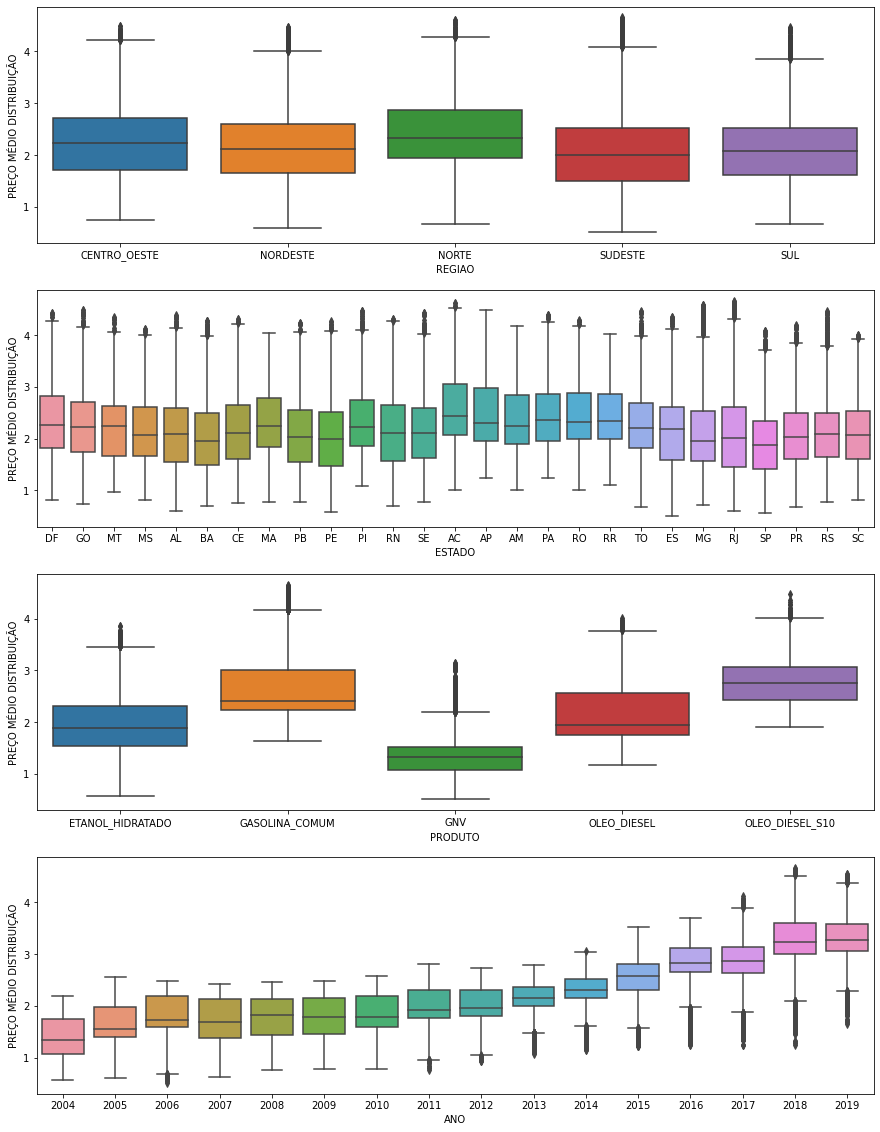

In [697]:
plt.figure(figsize=(15,20))

plt.subplot(4,1,1)
sns.boxplot(y='PREÇO MÉDIO DISTRIBUIÇÃO',x='REGIAO',data=df_reglin)

plt.subplot(4,1,2)
sns.boxplot(y='PREÇO MÉDIO DISTRIBUIÇÃO',x='ESTADO',data=df_reglin)

plt.subplot(4,1,3)
sns.boxplot(y='PREÇO MÉDIO DISTRIBUIÇÃO',x='PRODUTO',data=df_reglin)

plt.subplot(4,1,4)
sns.boxplot(y='PREÇO MÉDIO DISTRIBUIÇÃO',x='ANO',data=df_reglin)

Observamos que existem *outliers* presentes nos histogramas analisados, principalmente nas regiões (todas), produtos (todos) e anos (a partir de 2016 com maior ocorrência). Vamos avançar mesmo assim e verificar se o modelo via regressão linear consegue bons resultados, mesmo com estes valores discrepantes.

**Definindo matrizes X (variáveis candidatas - explicativas) e vetor y (variável alvo)**

Aqui, como dito anteriormente, iremos considerar como variáveis candidatas o preço médio de revenda, região, estado, produto e ano, e como variável alvo o preço médio de distribuição.

In [698]:
# Definindo a matriz X (variáveis candidatas) e o vetor y (variável alvo)
X_, y_ =  df_reglin[['PRECO_MEDIO_REVENDA','REGIAO','ESTADO','PRODUTO','ANO']],  df_reglin['PREÇO MÉDIO DISTRIBUIÇÃO']

Como as variáveis região, estado e produto são categóricas, iremos utilizar a função *get_dummies* da biblioteca **pandas** para conseguir utilizá-las no modelo de regressão linear. Essa função atribui para cada região, estado ou produto uma coluna na matriz X, com células preenchidas com 0 ou 1 equivalendo a **False** ou **True** para tal variável.




In [699]:
X_ = pd.get_dummies(data=X_)
X_.head()

,PRECO_MEDIO_REVENDA,ANO,REGIAO_CENTRO_OESTE,REGIAO_NORDESTE,REGIAO_NORTE,REGIAO_SUDESTE,REGIAO_SUL,ESTADO_AC,ESTADO_AL,ESTADO_AM,ESTADO_AP,ESTADO_BA,ESTADO_CE,ESTADO_DF,ESTADO_ES,ESTADO_GO,ESTADO_MA,ESTADO_MG,ESTADO_MS,ESTADO_MT,ESTADO_PA,ESTADO_PB,ESTADO_PE,ESTADO_PI,ESTADO_PR,ESTADO_RJ,ESTADO_RN,ESTADO_RO,ESTADO_RR,ESTADO_RS,ESTADO_SC,ESTADO_SE,ESTADO_SP,ESTADO_TO,PRODUTO_ETANOL_HIDRATADO,PRODUTO_GASOLINA_COMUM,PRODUTO_GNV,PRODUTO_OLEO_DIESEL,PRODUTO_OLEO_DIESEL_S10
0,1.288,2004,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,1.162,2004,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,1.389,2004,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,1.262,2004,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,1.181,2004,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


# Dados de treino e teste

Vamos agora dividir o nosso dataset em treino e teste, pela biblioteca **sklearn** e função *train_test_split*, considerando para teste uma seleção de 30% dos dados.

In [700]:
# Split the data into training/testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_, y_,test_size=0.30, random_state=42)

# Criando o modelo de Regressão Linear

In [701]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Treinando o modelo

In [702]:
# Train the model using the training sets
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Print de intercepto e coeficientes

In [703]:
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 22019310745.19932
Coefficients: 
 [ 8.98175243e-01 -1.16959265e-03 -1.99227706e+10 -8.58357626e+09
 -1.09217641e+10 -4.85614687e+09 -2.83253848e+09  1.73903028e+09
 -5.99157541e+08  1.73903028e+09  1.73903028e+09 -5.99157541e+08
 -5.99157541e+08  1.07400368e+10 -4.32658693e+09  1.07400368e+10
 -5.99157541e+08 -4.32658693e+09  1.07400368e+10  1.07400368e+10
  1.73903028e+09 -5.99157541e+08 -5.99157541e+08 -5.99157541e+08
 -6.35019533e+09 -4.32658693e+09 -5.99157541e+08  1.73903028e+09
  1.73903028e+09 -6.35019533e+09 -6.35019533e+09 -5.99157541e+08
 -4.32658693e+09  1.73903028e+09 -1.28365769e+10 -1.28365769e+10
 -1.28365769e+10 -1.28365769e+10 -1.28365769e+10]


Como temos 27 estados, 5 regiões, 5 produtos, a variável ano e variável preço médio de revenda, temos 39 coeficientes para a regressão além do intercepto.

# Predizendo valores

Vamos agora usar a matriz de teste que foi salva no *split* para predizer os valores e comparar os resultados obtidos pelo modelo e os valores reais.

In [704]:
# Make predictions using the testing set
y_pred = regr.predict(X_test)

**Plot das predições**

Observamos que aparentemente o modelo consegue entregar a tendência que descreve a dinâmica dos dados, mas precisamos ainda verificar o relatório da regressão e os valores de coeficiente de determinação ($R^2$) e $p$-valores para definirmos quais variáveis influenciam mais ou menos nos resultados.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


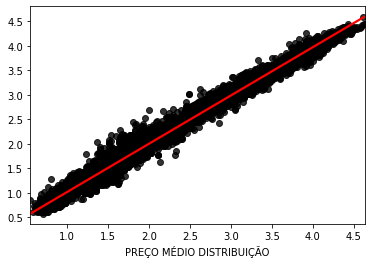

In [705]:
sns.regplot(y_test,y_pred, scatter_kws={"color": "black"}, line_kws={"color": "red"})

**Relatório do ajuste via regressão linear por mínimos quadrados**

In [706]:
import statsmodels.api as sm
X_train_Sm = sm.add_constant(X_train)
X_train_Sm = sm.add_constant(X_train)
ls = sm.OLS(y_train,X_train_Sm).fit()
print(ls.summary())

                               OLS Regression Results                               
Dep. Variable:     PREÇO MÉDIO DISTRIBUIÇÃO   R-squared:                       0.986
Model:                                  OLS   Adj. R-squared:                  0.986
Method:                       Least Squares   F-statistic:                 1.254e+05
Date:                      Mon, 29 Mar 2021   Prob (F-statistic):               0.00
Time:                              19:36:58   Log-Likelihood:                 61979.
No. Observations:                     58153   AIC:                        -1.239e+05
Df Residuals:                         58120   BIC:                        -1.236e+05
Df Model:                                32                                         
Covariance Type:                  nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------

In [707]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

Coefficients: 
 [ 8.98175243e-01 -1.16959265e-03 -1.99227706e+10 -8.58357626e+09
 -1.09217641e+10 -4.85614687e+09 -2.83253848e+09  1.73903028e+09
 -5.99157541e+08  1.73903028e+09  1.73903028e+09 -5.99157541e+08
 -5.99157541e+08  1.07400368e+10 -4.32658693e+09  1.07400368e+10
 -5.99157541e+08 -4.32658693e+09  1.07400368e+10  1.07400368e+10
  1.73903028e+09 -5.99157541e+08 -5.99157541e+08 -5.99157541e+08
 -6.35019533e+09 -4.32658693e+09 -5.99157541e+08  1.73903028e+09
  1.73903028e+09 -6.35019533e+09 -6.35019533e+09 -5.99157541e+08
 -4.32658693e+09  1.73903028e+09 -1.28365769e+10 -1.28365769e+10
 -1.28365769e+10 -1.28365769e+10 -1.28365769e+10]
Mean squared error: 0.01
Coefficient of determination: 0.99


O relatório do ajuste nos mostra que, apesar da regressão apresentar um coeficiente de determinação de 0.983, existem variáveis como ESTADO_BA, ESTADO_RR e ESTADO_TO que apresentam $p$-valores altos, indicando que talvez retirar a variável estado da análise possa ser mais interessante. Por um lado, perde-se a capacidade de predição para cada estado, entretanto é possível melhorar a predição com essa decisão, já que estas variáveis (Bahia, Roraima e Tocantins) não são significativas na predição.

# Modelo sem variável ESTADO

In [717]:
# Definindo a matriz X (variáveis candidatas) e o vetor y (variável alvo)
X_, y_ =  df_reglin[['PRECO_MEDIO_REVENDA','REGIAO','PRODUTO','ANO']],  df_reglin['PREÇO MÉDIO DISTRIBUIÇÃO']

Aplicando novamente a função *get_dummies*.

In [718]:
X_ = pd.get_dummies(data=X_)
X_.head()

,PRECO_MEDIO_REVENDA,ANO,REGIAO_CENTRO_OESTE,REGIAO_NORDESTE,REGIAO_NORTE,REGIAO_SUDESTE,REGIAO_SUL,PRODUTO_ETANOL_HIDRATADO,PRODUTO_GASOLINA_COMUM,PRODUTO_GNV,PRODUTO_OLEO_DIESEL,PRODUTO_OLEO_DIESEL_S10
0,1.288,2004,1,0,0,0,0,1,0,0,0,0
1,1.162,2004,1,0,0,0,0,1,0,0,0,0
2,1.389,2004,1,0,0,0,0,1,0,0,0,0
3,1.262,2004,1,0,0,0,0,1,0,0,0,0
4,1.181,2004,0,1,0,0,0,1,0,0,0,0


# Dados de treino e teste

In [719]:
# Split the data into training/testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_, y_,test_size=0.30, random_state=42)

# Criando o modelo de Regressão Linear

In [720]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Treinando o modelo

In [721]:
# Train the model using the training sets
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Predizendo valores

In [722]:
# Make predictions using the testing set
y_pred = regr.predict(X_test)

**Plot das predições**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


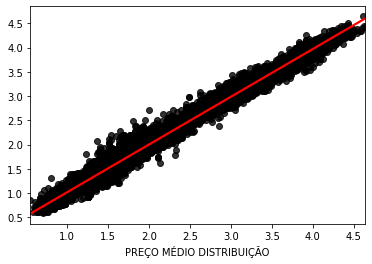

In [723]:
sns.regplot(y_test,y_pred, scatter_kws={"color": "black"}, line_kws={"color": "red"})

**Relatório do ajuste via regressão linear por mínimos quadrados**

In [724]:
import statsmodels.api as sm
X_train_Sm = sm.add_constant(X_train)
X_train_Sm = sm.add_constant(X_train)
ls = sm.OLS(y_train,X_train_Sm).fit()
print(ls.summary())

                               OLS Regression Results                               
Dep. Variable:     PREÇO MÉDIO DISTRIBUIÇÃO   R-squared:                       0.984
Model:                                  OLS   Adj. R-squared:                  0.984
Method:                       Least Squares   F-statistic:                 3.508e+05
Date:                      Mon, 29 Mar 2021   Prob (F-statistic):               0.00
Time:                              19:48:50   Log-Likelihood:                 58131.
No. Observations:                     58153   AIC:                        -1.162e+05
Df Residuals:                         58142   BIC:                        -1.161e+05
Df Model:                                10                                         
Covariance Type:                  nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------

Podemos observar uma melhor no coeficiente de determinação, bem como nos $p$-valores, que agora indicam que todas as variáveis usadas no ajuste são significativas. Assim, vamos usar este modelo como modelo final em nosso deploy.

Em maiores detalhes, este modelo com $R^2$ de 0.984 indica que 98.4 % da variação do preço médio de distribuição é explicado pelas variáveis região, produto, ano e preço médio de revenda.

# 5. Deploy básico

Vamos agora realizar um deploy básico de nosso modelo, apresentando uma forma do usuário inserir as informações de região, ano, produto e preço médio de revenda e obter o preço médio de distribuição dado pelo modelo que foi construído.

Importando a biblioteca para salvar e carregar o modelo.

In [726]:
import pickle

In [727]:
with open('regr.pkl','wb') as f:
    pickle.dump(regr,f)

# load
with open('regr.pkl', 'rb') as f:
    clf2 = pickle.load(f)

**Função que irá realizar o deploy**

In [728]:
# Deploy básico

def PreditorPrecoMedioDistribuicao( REGIAO, PRODUTO, PRECO_MEDIO_REVENDA, ANO):

  REGIAO_CENTRO_OESTE, REGIAO_NORDESTE, REGIAO_NORTE, REGIAO_SUDESTE, REGIAO_SUL = 0,0,0,0,0

  if REGIAO == 'CENTRO-OESTE':
    REGIAO_CENTRO_OESTE = 1;
  elif REGIAO == 'NORDESTE':
    REGIAO_NORDESTE = 1;
  elif REGIAO == 'NORTE':
    REGIAO_NORTE = 1;
  elif REGIAO == 'SUDESTE':
    REGIAO_SUDESTE = 1;
  elif REGIAO == 'SUL':
    REGIAO_SUL = 1;
  else:
    print('Região inválida.')
  
  PRODUTO_ETANOL_HIDRATADO, PRODUTO_GASOLINA_COMUM, PRODUTO_GNV, PRODUTO_OLEO_DIESEL, PRODUTO_OLEO_DIESEL_S10 = 0,0,0,0,0

  if PRODUTO == 'ETANOL HIDRATADO':
    PRODUTO_ETANOL_HIDRATADO = 1;
  elif PRODUTO == 'GASOLINA_COMUM':
    PRODUTO_GASOLINA_COMUM = 1;
  elif PRODUTO == 'GNV':
    PRODUTO_GNV = 1;
  elif PRODUTO == 'OLEO_DIESEL':
    PRODUTO_OLEO_DIESEL = 1;
  elif PRODUTO == 'OLEO_DIESEL_S10':
    PRODUTO_OLEO_DIESEL_S10 = 1;
  else:
    print('Produto inválido.')

  dados0 = {'PRECO_MEDIO_REVENDA': [PRECO_MEDIO_REVENDA], 'ANO': [ANO], 'REGIAO_CENTRO_OESTE': [REGIAO_CENTRO_OESTE], 'REGIAO_NORDESTE': [REGIAO_NORDESTE], 'REGIÃO_NORTE': [REGIAO_NORTE],
          'REGIÃO_SUDESTE': [REGIAO_SUDESTE], 'REGIÃO_SUL': [REGIAO_SUL], 
          'PRODUTO_ETANOL_HIDRATADO': [PRODUTO_ETANOL_HIDRATADO],
          'PRODUTO_GASOLINA_COMUM': [PRODUTO_GASOLINA_COMUM],  'PRODUTO_GNV': [PRODUTO_GNV], 'PRODUTO_OLEO_DIESEL': [PRODUTO_OLEO_DIESEL],
          'PRODUTO_OLEO_DIESEL_S10': [PRODUTO_OLEO_DIESEL_S10]}

  dados = pd.DataFrame(dados0)

  with open('regr.pkl', 'rb') as f:
    modelo = pickle.load(f)

  pred = regr.predict(dados)

  print(' ')
  print('Região: {}'.format(REGIAO))
  print('Ano: {}'.format(ANO))
  print('Produto: {}'.format(PRODUTO))
  print('Preço Médio de Revenda: {:.2f} R$/litro ou R$/m³ no caso de GNV'.format(PRECO_MEDIO_REVENDA))
  
  
  print(' ')
  print('Preço Médio de Distribuição predito: {:.2f} R$/litro ou R$/m³ no caso de GNV'.format(np.float(pred)))

# Teste do deploy

Aqui é feito o teste da função construída para deploy e verificação do funcionamento do modelo como preditor do preço médio de distribuição dados região, produto, ano e preço médio de revenda.

In [740]:
# Insira a região (CENTRO-OESTE, NORDESTE, NORTE, SUDESTE, SUL)
Regiao = 'NORTE'

# Insira o produto (ETANOL_HIDRATADO, GASOLINA_COMUM, GNV, OLEO_DIESEL, OLEO_DIESEL_S10)
Produto = 'GNV'

# Insira o preço médio de revenda
PMR = 2.7

# Insira o ano (entre 2004 e 2019)
Ano = 2010

###############################################################################
###############################################################################

predicao = PreditorPrecoMedioDistribuicao(Regiao, Produto, PMR, Ano)

 
Região: NORTE
Ano: 2010
Produto: GNV
Preço Médio de Revenda: 2.70 R$/litro ou R$/m³ no caso de GNV
 
Preço Médio de Distribuição predito: 2.06 R$/litro ou R$/m³ no caso de GNV
